In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [35]:
data = pd.read_csv("movie_metadata.csv")

In [36]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

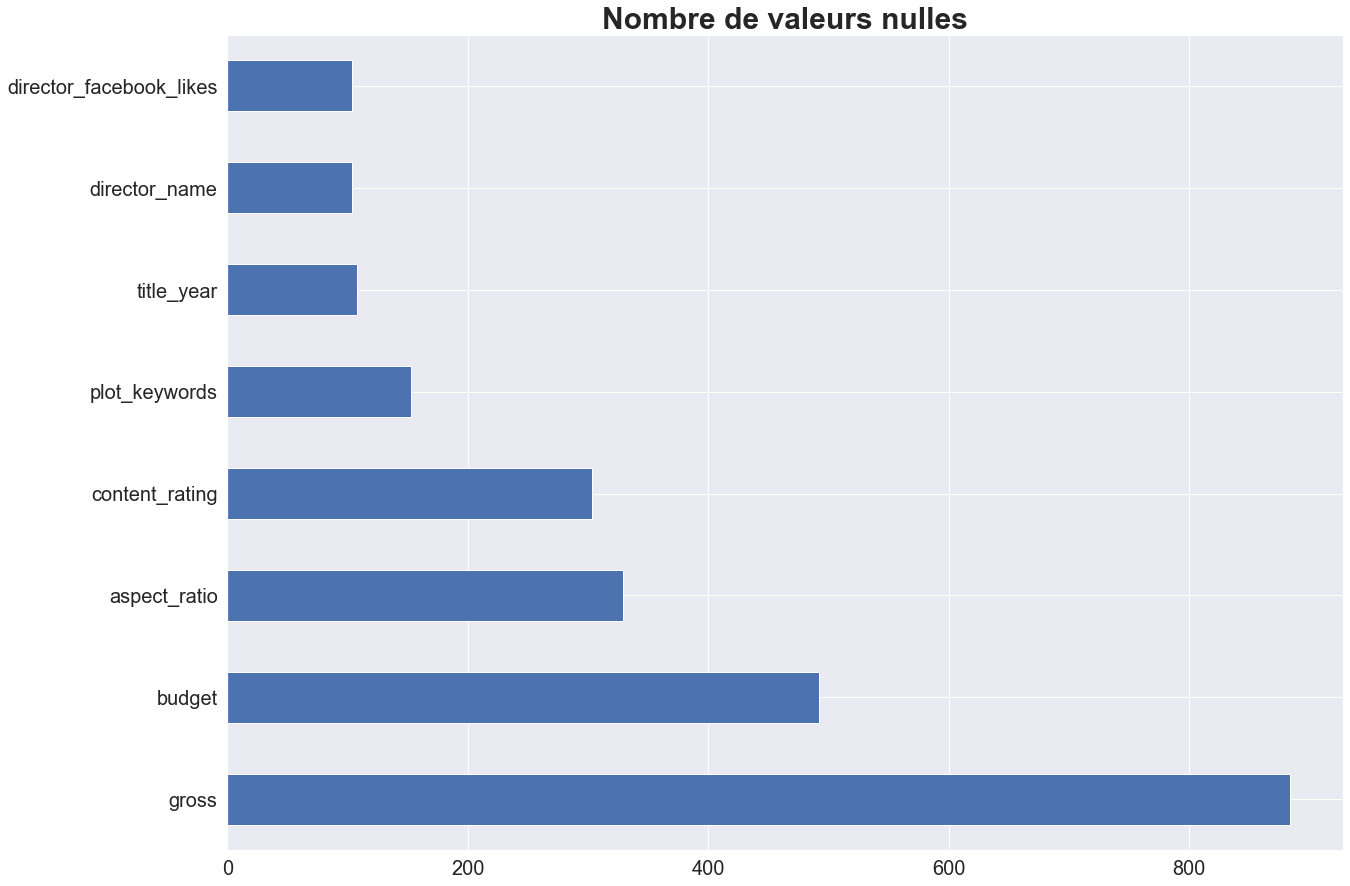

In [48]:

#sns.scatterplot(data = data.isnull().sum().sort_values(ascending=False))
data.isnull().sum().sort_values(ascending=False).head(8).plot(kind='barh',figsize=(20,15))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Nombre de valeurs nulles",fontsize=30, fontweight='bold')

plt.show()

In [49]:
# colonne objet remplacés par le mode

data["color"].fillna(data["color"].mode()[0],inplace=True)
data["director_name"].fillna(data["director_name"].mode()[0],inplace=True)
data["actor_2_name"].fillna(data["actor_2_name"].mode()[0],inplace=True)
data["genres"].fillna(data["genres"].mode()[0],inplace=True)

data["actor_1_name"].fillna(data["actor_1_name"].mode()[0],inplace=True)
data["actor_3_name"].fillna(data["actor_3_name"].mode()[0],inplace=True)
data["plot_keywords"].fillna(data["plot_keywords"].mode()[0],inplace=True)



data["language"].fillna(data["language"].mode()[0],inplace=True)
data["country"].fillna(data["country"].mode()[0],inplace=True)
data["content_rating"].fillna(data["content_rating"].mode()[0],inplace=True)



In [50]:
# colonne numérique remplacés par la moyenne ou la médiane en fonction de la distribution

data["num_critic_for_reviews"].fillna(data["num_critic_for_reviews"].median(),inplace=True)
data["duration"].fillna(data["duration"].median(),inplace=True)
data["director_facebook_likes"].fillna(data["director_facebook_likes"].median(),inplace=True)
data["actor_3_facebook_likes"].fillna(data["actor_3_facebook_likes"].median(),inplace=True)
data["actor_1_facebook_likes"].fillna(data["actor_1_facebook_likes"].median(),inplace=True)
data["gross"].fillna(data["gross"].median(),inplace=True)
data["facenumber_in_poster"].fillna(data["facenumber_in_poster"].median(),inplace=True)
data["num_user_for_reviews"].fillna(data["num_user_for_reviews"].median(),inplace=True)
data["budget"].fillna(data["budget"].median(),inplace=True)

data["title_year"].fillna(data["title_year"].median(),inplace=True)
data["actor_2_facebook_likes"].fillna(data["actor_2_facebook_likes"].median(),inplace=True)
data["aspect_ratio"].fillna(data["aspect_ratio"].median(),inplace=True)



In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5043 non-null object
director_name                5043 non-null object
num_critic_for_reviews       5043 non-null float64
duration                     5043 non-null float64
director_facebook_likes      5043 non-null float64
actor_3_facebook_likes       5043 non-null float64
actor_2_name                 5043 non-null object
actor_1_facebook_likes       5043 non-null float64
gross                        5043 non-null float64
genres                       5043 non-null object
actor_1_name                 5043 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5043 non-null object
facenumber_in_poster         5043 non-null float64
plot_keywords                5043 non-null object
movie_imdb_link              5043 non-

In [52]:
dataClean = data.dropna()

In [53]:
dataClean.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

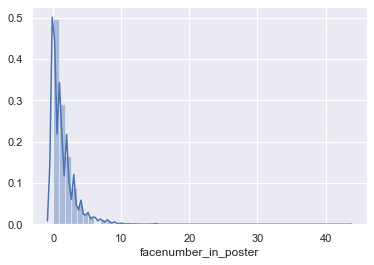

In [54]:
sns.distplot(dataClean["facenumber_in_poster"])

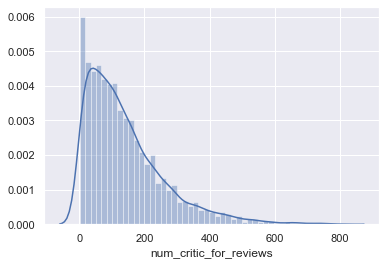

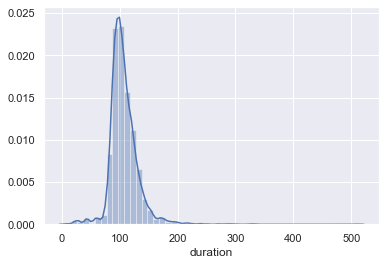

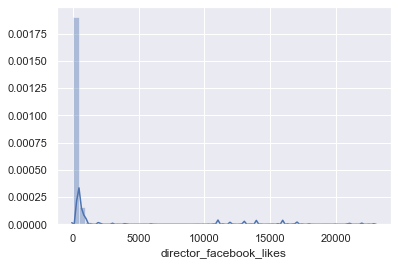

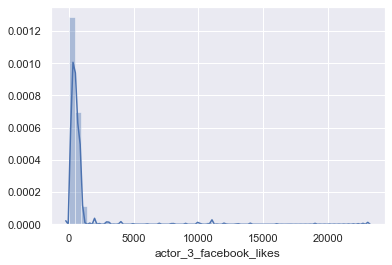

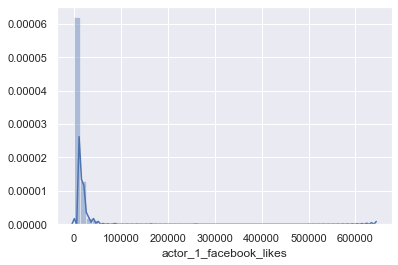

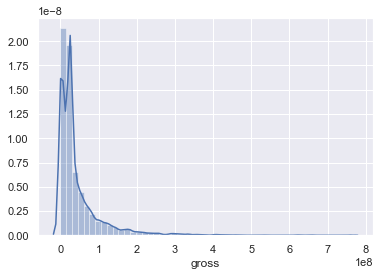

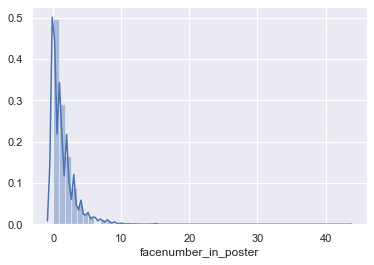

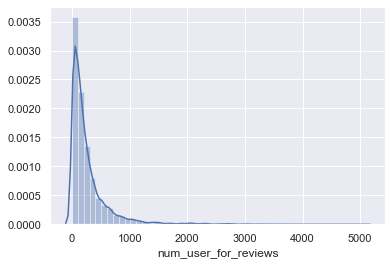

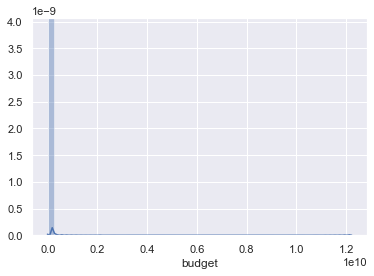

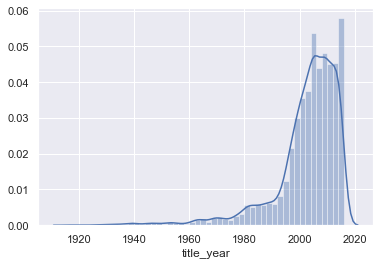

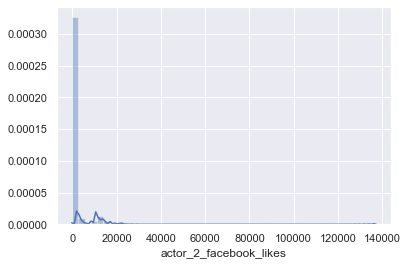

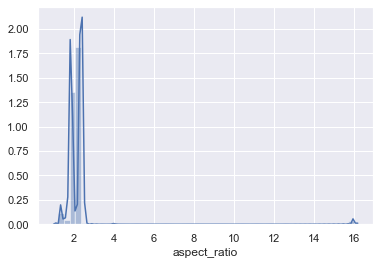

In [55]:
for col in ['num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross',
       'facenumber_in_poster',
       'num_user_for_reviews',
       'budget', 'title_year', 'actor_2_facebook_likes',
       'aspect_ratio'] :
    sns.distplot(dataClean[col])
    plt.show()

In [56]:
dataClean.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Doug Walker,110.0,103.0,131.0,371.5,Rob Walker,131.0,25517500.0,Documentary,...,156.0,English,USA,R,20000000.0,2005.0,12.0,7.1,2.35,0


In [57]:
dataClean.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [58]:
dataClean['movie_title'].describe()

count           5043
unique          4917
top       King Kong 
freq               3
Name: movie_title, dtype: object

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


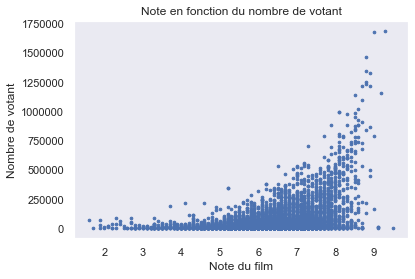

In [59]:

var = 'num_voted_users'

data = pd.concat([dataClean['imdb_score'], dataClean[var]], axis=1)
data.plot.scatter(x='imdb_score', y=var, s = [7], grid=False)
plt.title("Note en fonction du nombre de votant")
plt.xlabel("Note du film")
plt.ylabel("Nombre de votant")

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


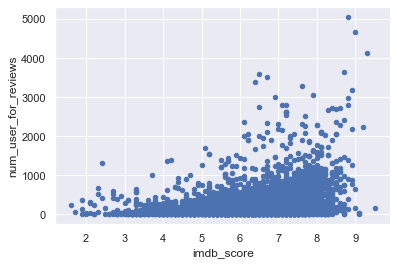

In [28]:
var = 'num_user_for_reviews'
data = pd.concat([dataClean['imdb_score'], dataClean[var]], axis=1)
data.plot.scatter(x='imdb_score', y=var);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


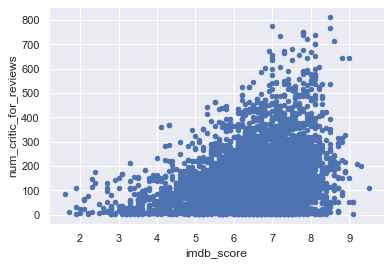

In [29]:
var = 'num_critic_for_reviews'
data = pd.concat([dataClean['imdb_score'], dataClean[var]], axis=1)
data.plot.scatter(x='imdb_score', y=var);

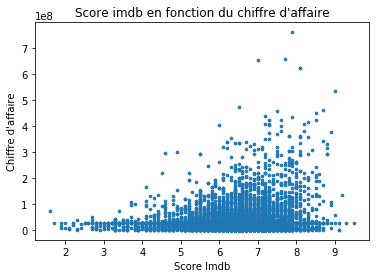

In [20]:
var = 'gross'
data = pd.concat([dataClean['imdb_score'], dataClean[var]], axis=1)
data.plot.scatter(x='imdb_score', y=var, s = [7])
plt.title("Score imdb en fonction du chiffre d'affaire")
plt.xlabel("Score Imdb")
plt.ylabel("Chiffre d'affaire")
plt.show()

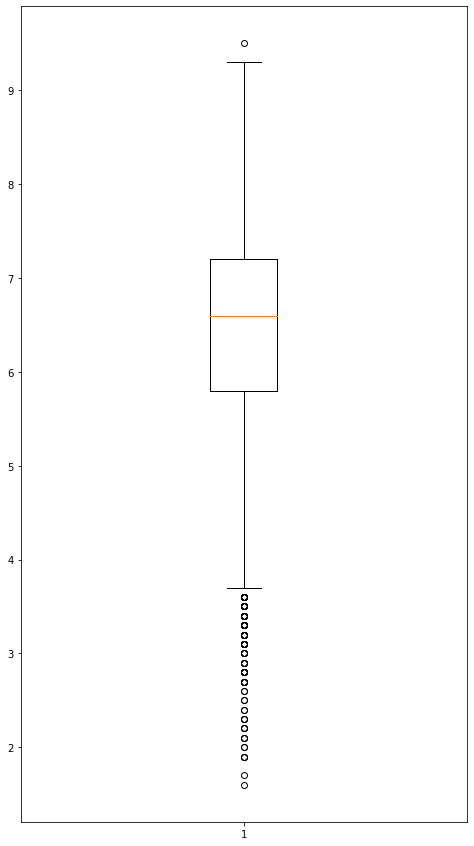

In [21]:
#box plot 
var = 'num_voted_users'
data = pd.concat([dataClean['imdb_score'], dataClean[var]], axis=1)
fig, ax = plt.subplots(figsize=(8, 15))
fig = plt.boxplot(x="imdb_score", data=dataClean)
#fig.axis(ymin=0, ymax=800000)


(array([1]), <a list of 1 Text xticklabel objects>)

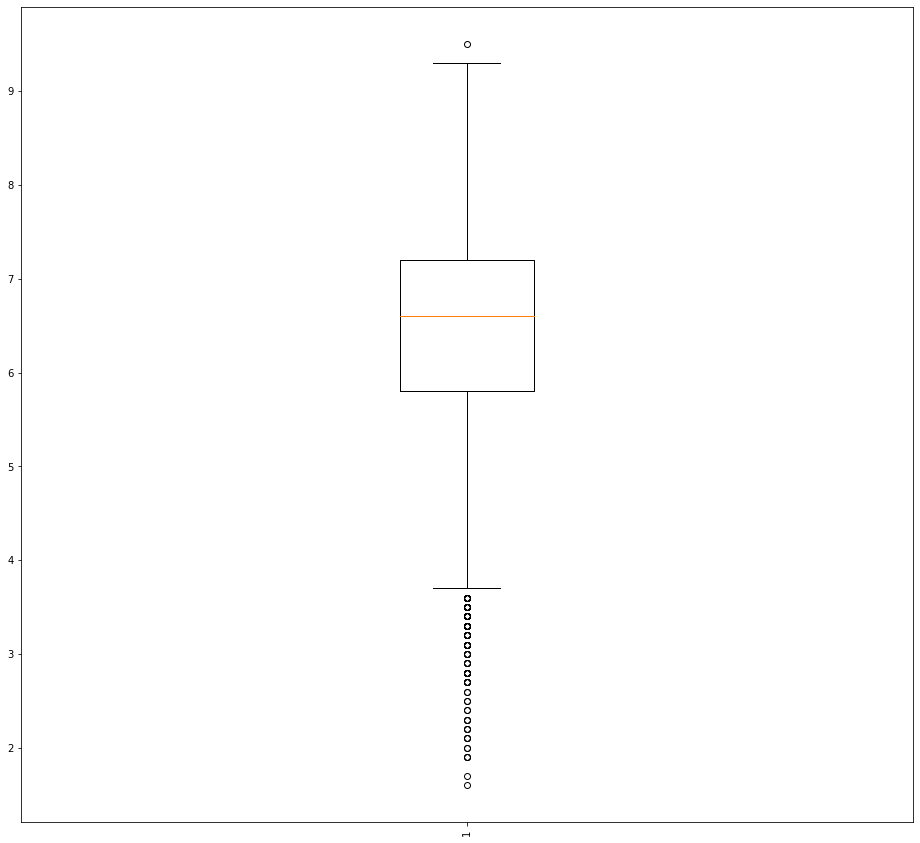

In [22]:
var = 'num_voted_users'
data = pd.concat([dataClean['imdb_score'], dataClean[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 15))
fig = plt.boxplot(x="imdb_score", data=dataClean)
#fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)


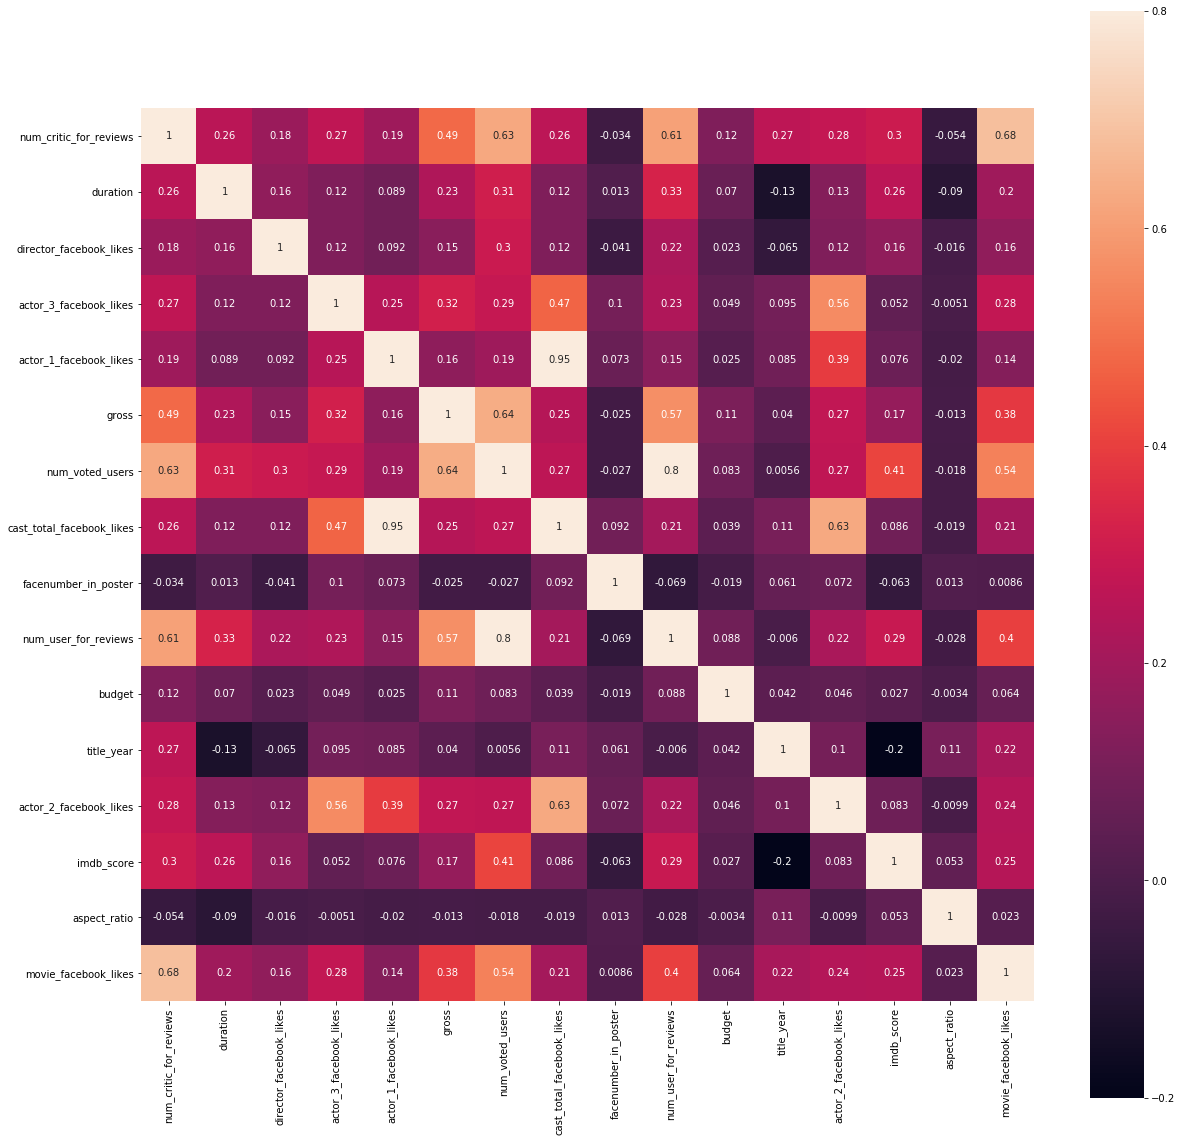

In [23]:
#correlation matrix
corrmat = dataClean.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True)

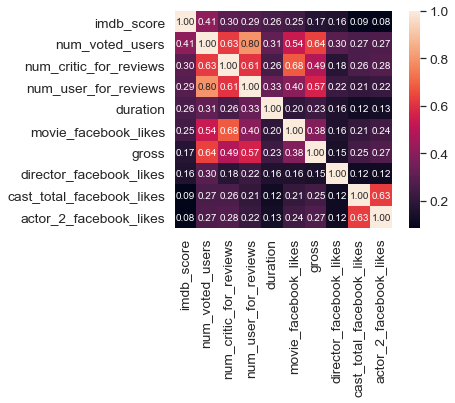

In [24]:
#imdbscore correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'imdb_score')['imdb_score'].index
cm = np.corrcoef(dataClean[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

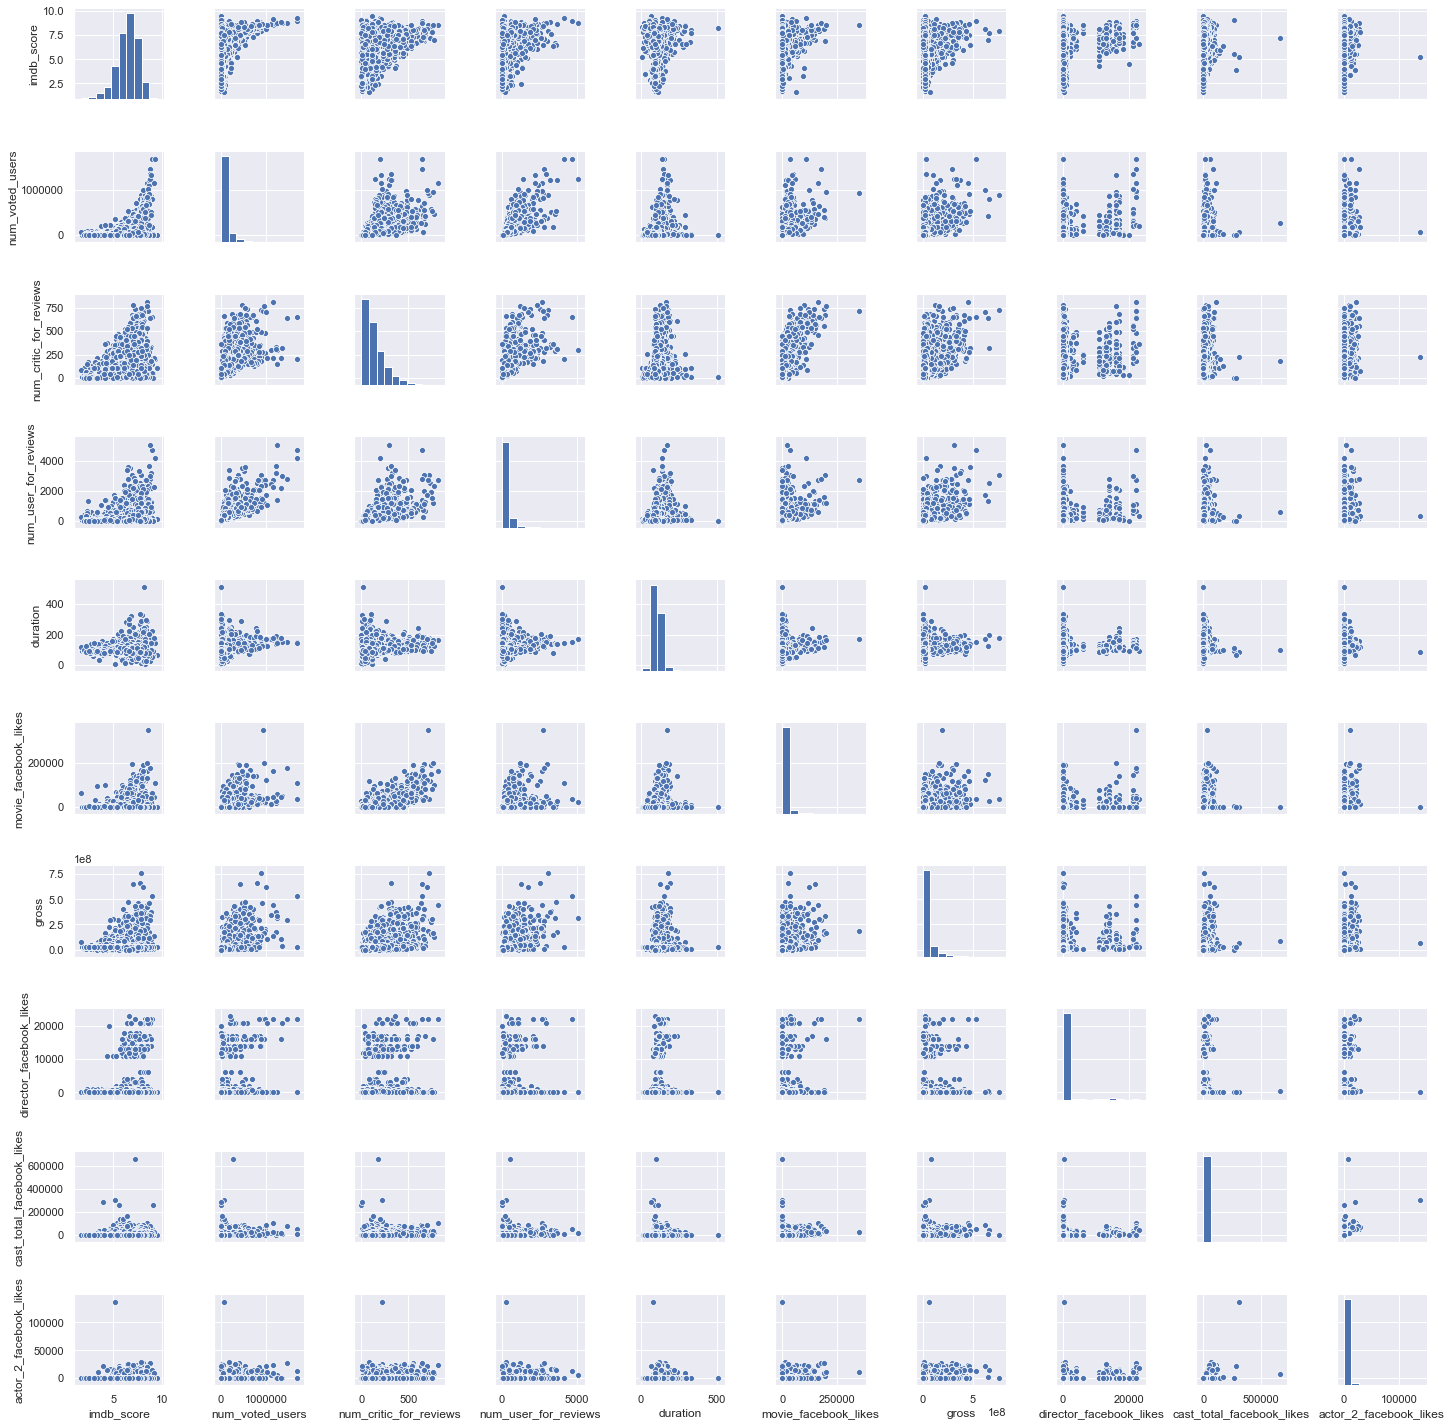

In [25]:
#scatterplot
sns.set()
cols = ['imdb_score', 'num_voted_users', 'num_critic_for_reviews', 'num_user_for_reviews', 'duration', 'movie_facebook_likes', 'gross', 'director_facebook_likes', 'cast_total_facebook_likes', 'actor_2_facebook_likes']
sns.pairplot(dataClean[cols], height = 2)
plt.show()

In [ ]:
#missing data
total = dataClean.isnull().sum().sort_values(ascending=False)
percent = (dataClean.isnull().sum()/dataClean.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [ ]:
# outliers
#standardizing data
imdb_score_scaled = StandardScaler().fit_transform(dataClean['imdb_score'][:,np.newaxis]);
low_range = imdb_score_scaled[imdb_score_scaled[:,0].argsort()][:10]
high_range= imdb_score_scaled[imdb_score_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

In [ ]:
#bivariate analysis 
var = 'imdb_score'
data = pd.concat([dataClean['gross'], dataClean[var]], axis=1)
data.plot.scatter(x=var, y='gross')
plt.show()

In [ ]:
#histogram and normal probability plot
sns.distplot(dataClean['imdb_score'], fit=norm);
fig = plt.figure()
res = stats.probplot(dataClean['imdb_score'], plot=plt)

In [ ]:
#applying log transformation
dataClean['imdb_score'] = np.log(dataClean['imdb_score'])

#transformed histogram and normal probability plot
sns.distplot(dataClean['imdb_score'], fit=norm);
fig = plt.figure()
res = stats.probplot(dataClean['imdb_score'], plot=plt)



In [ ]:
#histogram and normal probability plot
sns.distplot(dataClean['gross'], fit=norm);
fig = plt.figure()
res = stats.probplot(dataClean['gross'], plot=plt)



In [ ]:
#data transformation
dataClean['gross'] = np.log(dataClean['gross'])

#transformed histogram and normal probability plot
sns.distplot(dataClean['gross'], fit=norm);
fig = plt.figure()
res = stats.probplot(dataClean['gross'], plot=plt)
